In [1]:
import networkx as net

In [2]:
import urllib

In [2]:
g = net.Graph()

In [4]:
g.add_edge('a','b')

In [13]:
g.add_edge('b','c')
g.add_edge('c','a')

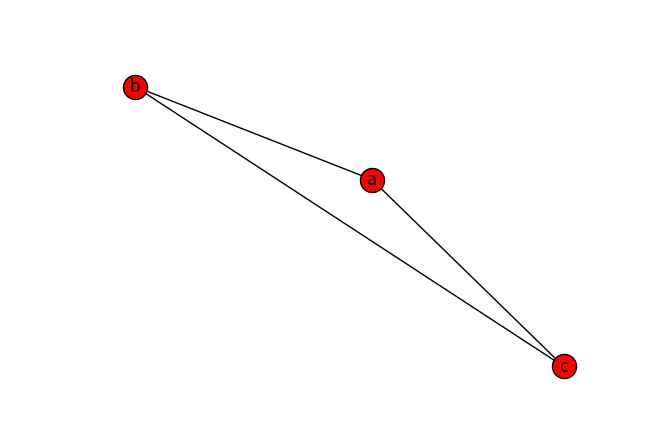

In [28]:
net.draw(g,with_labels=True)
#net.draw(g,pos=net.spring_layout(g)) # use spring layout
import matplotlib.pyplot as plt
plt.show()

In [29]:
g.nodes()

['b', 'a', 'c']

In [30]:
g.edges()

[('b', 'a'), ('b', 'c'), ('a', 'c')]

In [32]:
g.node['a']

{}

In [34]:
g.node['a']['size'] = 1

In [35]:
g.node['a']

{'size': 1}

In [36]:
g['a']

{'b': {}, 'c': {}}

In [67]:
#http://stackoverflow.com/questions/19827615/startswith-typeerror-in-function
from urllib.request import urlopen
def read_lj_friends(g, name):
    # fetch the friend-list from LiveJournal
    target_url = urllib.request.Request('http://www.livejournal.com/misc/fdata.bml?user='+name)
    response = urlopen(target_url)
    for line in response.readlines():
        #Comments in the response start with a '#'
        if line.startswith(b'#'): continue 
        
        # the format is "< name" (incoming) or "> name" (outgoing)
        parts=line.split()
        
        #make sure that we don't have an empty line
        if len(parts)==0: continue
        
        #add the edge to the network
        if parts[0]=='<': 
            g.add_edge(parts[1],name)
        else:
            g.add_edge(name,parts[1])

In [68]:
g = net.Graph()

In [69]:
read_lj_friends(g,'valerois')

In [70]:
len(g)

311

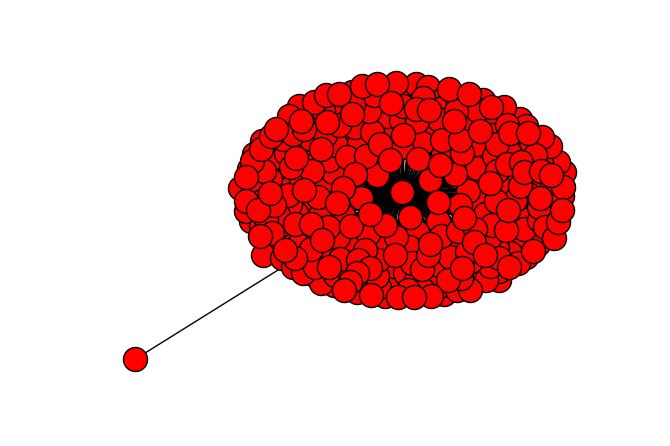

In [74]:
net.draw(g)
plt.show()

In [84]:
def snowball_sampling(g, center, max_depth=1, current_depth=0, taboo_list=[]):
    # if we have reached the depth limit of the search, bomb out.
    print (center, current_depth, max_depth, taboo_list)
    if current_depth==max_depth: 
        print ('out of depth')
        return taboo_list
    if center in taboo_list:
        print ('taboo')
        return taboo_list #we've been here before
    else:
        taboo_list.append(center) # we shall never return
        
    read_lj_friends(g, center)
    
    for node in g.neighbors(center):
        taboo_list=snowball_sampling(g, node, current_depth=current_depth+1, max_depth=max_depth, taboo_list=taboo_list)
    
    return taboo_list

In [86]:
snowball_sampling(g,'kozel_na_sakse')

kozel_na_sakse 0 1 ['valerois']
b'jolita' 1 1 ['valerois', 'kozel_na_sakse']
out of depth
b'tanyakotova' 1 1 ['valerois', 'kozel_na_sakse']
out of depth
b'emjudob' 1 1 ['valerois', 'kozel_na_sakse']
out of depth
b'hamptonlanny' 1 1 ['valerois', 'kozel_na_sakse']
out of depth
b'doctor_livsy' 1 1 ['valerois', 'kozel_na_sakse']
out of depth
b'dr_livsig' 1 1 ['valerois', 'kozel_na_sakse']
out of depth
b'nikitosbro' 1 1 ['valerois', 'kozel_na_sakse']
out of depth
b'valerois' 1 1 ['valerois', 'kozel_na_sakse']
out of depth
b'saper' 1 1 ['valerois', 'kozel_na_sakse']
out of depth
b'to_to_i_ono_to' 1 1 ['valerois', 'kozel_na_sakse']
out of depth
b'cheese_people' 1 1 ['valerois', 'kozel_na_sakse']
out of depth
b'guy_gomel' 1 1 ['valerois', 'kozel_na_sakse']
out of depth
b'husky_wardsa' 1 1 ['valerois', 'kozel_na_sakse']
out of depth
b'gingea' 1 1 ['valerois', 'kozel_na_sakse']
out of depth
b'solo_oboroten' 1 1 ['valerois', 'kozel_na_sakse']
out of depth
b'cr' 1 1 ['valerois', 'kozel_na_sakse']


['valerois', 'kozel_na_sakse']

In [87]:
net.write_pajek(g,'live_journal.net')

In [88]:
g = net.read_pajek('live_journal.net')

In [89]:
len(g)

347

In [2]:
g = net.read_pajek(r'C:\Users\piush\Desktop\Dataset\SNABook-master\chapter3\russians.net')

In [4]:
len(g)

87250

In [6]:
#compute degree
deg = net.degree(g)

In [6]:
deg['valerois']

232

In [7]:
min(deg.values())

1

In [8]:
max(deg.values())

4691

##### Sort out the dictionary by values in python3

 http://stackoverflow.com/questions/20944483/python-3-sort-a-dict-by-its-values

In [3]:
### This function returns a sorted degree list
### useful for celebrity spotting

#import operator
def sorted_map(map):
    ms = [(k, map[k]) for k in sorted(map, key=map.get, reverse=True)]
    #ms = sorted(map.items(),key = operator.itemgetter(1),reverse = True)
    return ms


In [4]:
### Get Top10 list
def top(deg, toplist=10):
    print ('Sort the map to spot the celebrities')
    ds = sorted_map(deg)
    print ('and print the top '+str(toplist))
    print (ds[0:toplist])
    return ds

In [7]:
ds=top(deg, toplist=15)

Sort the map to spot the celebrities
and print the top 15
[('borisakunin', 4691), ('doctor_liza', 3046), ('tareeva', 2970), ('cheger', 2887), ('karial', 2717), ('snorapp', 2707), ('masha_koroleva', 2683), ('elladkin', 2616), ('samoleg', 2597), ('zina_korzina', 2596), ('xlarina', 2582), ('gracebirkin', 2575), ('a_dyukov', 2542), ('azbukivedi', 2541), ('bakushinskaya', 2513)]


In [10]:
import matplotlib.pyplot as plot

In [11]:
h=plot.hist(list(deg.values()),100)
plot.savefig('centrality_hist.png')
plot.close()
plot.show()

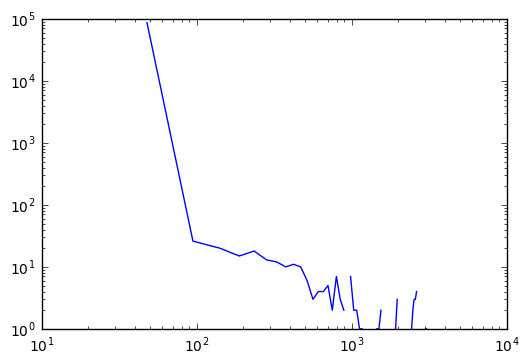

In [12]:
plot.loglog(h[1][1:],h[0])
plot.show()

In [13]:
### Remove pendant and isolated nodes from the graph
def trim_degrees(g, degree=1):
    print ('Show network for degree > ' + str(degree))
    filename = 'core' + str(degree) + '.png'
    g2=g.copy()
    d=net.degree(g2)
    for n in g2.nodes():
        if d[n]<=degree: g2.remove_node(n)
    net.draw(g2)
    plot.savefig(filename)
    plot.close()
    return g2


In [14]:
# Reduce map by removing pendants and isolated nodes
print ('Remove pendants and isolated nodes')

core30=trim_degrees(g, degree=30)

Remove pendants and isolated nodes
Show network for degree > 30


In [15]:
core10=trim_degrees(g, degree=10)


Show network for degree > 10


In [16]:
core20=trim_degrees(g, degree=20)

Show network for degree > 20


In [18]:
# Calculate closeness for core30
print ('Calculate closeness for core30')
c=net.closeness_centrality(core30)

Calculate closeness for core30


Sort map
Sort the map to spot the celebrities
and print the top 10
[('valerois', 0.9663865546218487), ('bagira', 0.5693069306930693), ('azbukivedi', 0.5679012345679012), ('karial', 0.5463182897862233), ('kpoxa_e', 0.5463182897862233), ('eprst2000', 0.5437352245862884), ('angerona', 0.5373831775700935), ('mamaracha', 0.5336426914153132), ('alinaf', 0.5324074074074074), ('_milashka', 0.5324074074074074)]


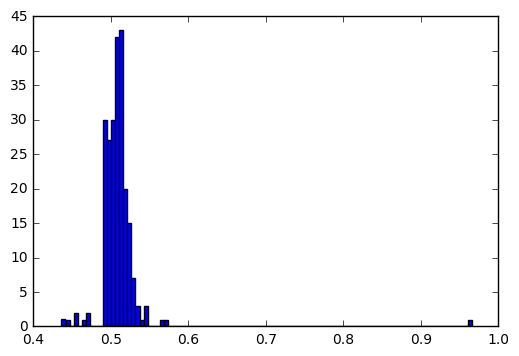

In [20]:
print ('Sort map')
top(c)
h=plot.hist(list(c.values()),100)
plot.show()
#plot.savefig('hist_core30.png')
#plot.close()

In [21]:
# Calculate closeness for core10
print ('Calculate closeness for core10')
c=net.closeness_centrality(core10)

Calculate closeness for core10


Sort map
Sort the map to spot the celebrities
and print the top 10
[('azbukivedi', 0.6155378486055777), ('valerois', 0.6137040714995035), ('bagira', 0.5896946564885496), ('karial', 0.5738161559888579), ('kpoxa_e', 0.5722222222222222), ('yelya', 0.5369244135534318), ('kirulya', 0.5364583333333334), ('angerona', 0.535064935064935), ('borisakunin', 0.53184165232358), ('snorapp', 0.5300171526586621)]


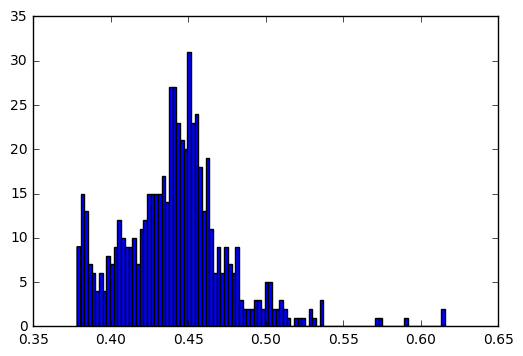

In [25]:
print ('Sort map')
cs = top(c)
h=plot.hist(list(c.values()),100)
plot.show()

In [26]:
# Get betweenness
print ('Get betweenness centrality')
b30=net.betweenness_centrality(core30)
bs=sorted_map(b30)
b10=net.betweenness_centrality(core10)
bs=sorted_map(b10)

Get betweenness centrality


In [27]:
# Combine all information
print ('Combine all information')
names1=[x[0] for x in ds[:10]]
names2=[x[0] for x in cs[:10]]
names3=[x[0] for x in bs[:10]]
names=list((set(names1) | set(names2) | set(names3)))
table=[[name,deg[name],c[name],b10[name]] for name in names]
print (table)

Combine all information
[['tareeva', 2970, 0.47575057736720555, 0.005884690487303415], ['snorapp', 2707, 0.5300171526586621, 0.026244420037490557], ['elladkin', 2616, 0.46466165413533833, 0.01572823640015297], ['bagira', 1481, 0.5896946564885496, 0.06415743377135986], ['karial', 2717, 0.5738161559888579, 0.049436498735116984], ['eprst2000', 2510, 0.5286569717707442, 0.021420612080769168], ['kpoxa_e', 946, 0.5722222222222222, 0.04044127058417222], ['yelya', 582, 0.5369244135534318, 0.015239326752752018], ['azbukivedi', 2541, 0.6155378486055777, 0.0906854698375361], ['masha_koroleva', 2683, 0.4959871589085072, 0.012624543545596013], ['valerois', 232, 0.6137040714995035, 0.21148671833684946], ['samoleg', 2597, 0.4753846153846154, 0.015663680463377627], ['zina_korzina', 2596, 0.49282296650717705, 0.008964320341170732], ['doctor_liza', 3046, 0.48168355416991426, 0.020507259543668853], ['cheger', 2887, 0.3992248062015504, 0.0007174304877532311], ['angerona', 752, 0.535064935064935, 0.0192380

In [34]:
net.pagerank(net.Graph(g))

{'zmeyka_taya': 2.5881284220863887e-05,
 'v_zerkal': 4.3950881762835375e-06,
 'bu_ra': 4.34743561896496e-06,
 'pityara': 4.247864552195891e-06,
 'dudnev': 6.346888574579029e-06,
 'glo_ku': 5.890662293266436e-06,
 'uninco': 4.070448691553828e-06,
 'ping_ving': 4.276152059800469e-06,
 'malinowsky': 4.464196540456912e-06,
 'tusyko': 4.944713967397548e-06,
 'tea88': 4.702089850726792e-06,
 'ovtza': 4.269631347969028e-06,
 'jirafka': 7.277112946006546e-06,
 'onehalf_3544_m': 4.800586885685576e-06,
 'lugovaya_arfa': 4.804053945019349e-06,
 'ya_domovoy': 6.971970948912096e-06,
 'korsakon': 4.066096443121818e-06,
 'srn_ru': 8.128624545305301e-06,
 'unintendedbloom': 4.430928199606948e-06,
 'ator_ru': 5.3553968853844005e-06,
 'hedge_sun': 6.404233998224424e-06,
 'latinyanin': 6.683157080438375e-06,
 'muzika_dogdia': 4.800586885685576e-06,
 'sam_bacon': 4.800586885685576e-06,
 'utichka': 5.3553968853844005e-06,
 'empty_castle': 4.247864552195891e-06,
 'pepilota': 8.85924554201082e-06,
 'igort75'